In [1]:
# Functional libs
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Visual libs
from sklearn.metrics import ConfusionMatrixDisplay

# Own functions
from Functions import engineer_features
from Functions import split_data
from Functions import accuracy_scorer
from Functions import run_RF
from Functions import normalize
from Functions import remove_outliers_iqr

In [2]:
data = pd.read_csv('../FIFA18_players_database/CompleteDataset.csv', low_memory=False)
data = engineer_features(data)
data = data.sample(frac=1).reset_index(drop=True)

In [3]:
X_train, X_test, y_train, y_test = split_data(data, 0)

In [4]:
# RF trained on not normalized data and outliers included, no hyperparameter tuning.
y_test_pred, y_train_pred, rf_classifier = run_RF(X_train, X_test, y_train, 100, 10, 5,"sqrt", 30, True)

test_accuracy = accuracy_scorer(y_test, y_test_pred)
train_accuracy = accuracy_scorer(y_train, y_train_pred)

print(f'Test accuracy: {test_accuracy:0.3f}')
print(f'Train accuracy: {train_accuracy:0.3f}')

Test accuracy: 0.770
Train accuracy: 0.583


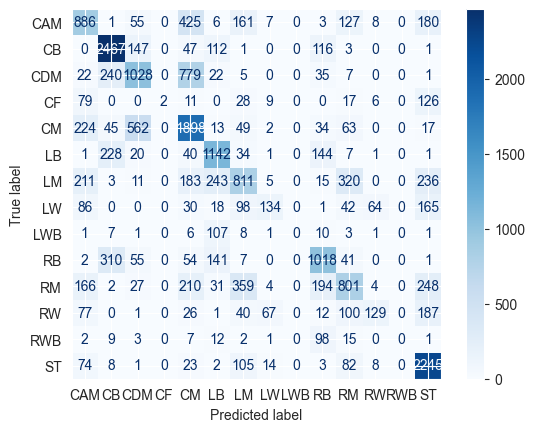

In [5]:
ConfusionMatrixDisplay.from_estimator(rf_classifier, X_train, y_train, cmap="Blues")

In [6]:
X_train_minmax = normalize(X_train, "minmax", False)
X_test_minmax = normalize(X_test, "minmax",False)

In [7]:
### RF trained on normalized data with outliers. No hyperparameter tuning
y_test_pred, y_train_pred, rf_classifier = run_RF(X_train_minmax, X_test_minmax, y_train, 100, 10, 5,"sqrt", 30, True)

test_accuracy = accuracy_scorer(y_test, y_test_pred)
train_accuracy = accuracy_scorer(y_train, y_train_pred)

print(f'Test accuracy: {test_accuracy:0.3f}')
print(f'Train accuracy: {train_accuracy:0.3f}')

Test accuracy: 0.763
Train accuracy: 0.584


In [8]:
df_no_outliers = remove_outliers_iqr(data)
X_train, X_test, y_train, y_test = split_data(df_no_outliers, 0)
X_train_minmax = normalize(X_train, "minmax", False)
X_test_minmax = normalize(X_test, "minmax",False)

In [9]:
### RF trained on normalized data with outliers removed. No tuning of hyperparameters.

y_test_pred, y_train_pred, rf_classifier = run_RF(X_train_minmax, X_test_minmax, y_train, 100, 10, 5,"sqrt", 30, True)

test_accuracy = accuracy_scorer(y_test, y_test_pred)
train_accuracy = accuracy_scorer(y_train, y_train_pred)

print(f'Test accuracy: {test_accuracy:0.3f}')
print(f'Train accuracy: {train_accuracy:0.3f}')

Test accuracy: 0.759
Train accuracy: 0.584


In [10]:
### RF trained on not-normalized data with outliers removed. No turning of hyperparameters.
y_test_pred, y_train_pred, rf_classifier = run_RF(X_train, X_test, y_train, 100, 10, 5,"sqrt", 30, True)

test_accuracy = accuracy_scorer(y_test, y_test_pred)
train_accuracy = accuracy_scorer(y_train, y_train_pred)

print(f'Test accuracy: {test_accuracy:0.3f}')
print(f'Train accuracy: {train_accuracy:0.3f}')

Test accuracy: 0.768
Train accuracy: 0.584


In [11]:
# Hyperparameters to try
param_grid = {
    'n_estimators': [100],
    'max_depth': [30],
    'min_samples_split': [10],
    'min_samples_leaf': [5],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

In [12]:
# Find best parameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=1, verbose=0)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_scorer(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("Best Hyperparameters:", grid_search.best_params_)
      

Test Accuracy: 0.7687
Best Hyperparameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}


Best model is, bootstrap: True, max_depth: 30, max_features: sqrt, min_samples_leaf: 5, min_samples_split: 10, 'n_estimators': 100

In [13]:
### BEST!, not normalized, without outliers and with the best hyperparameters.
y_test_pred, y_train_pred, rf_classifier = run_RF(X_train, X_test, y_train, 200, 10, 5,"sqrt", 30, True)

test_accuracy = accuracy_scorer(y_test, y_test_pred)
train_accuracy = accuracy_scorer(y_train, y_train_pred)

print(f'Test accuracy: {test_accuracy:0.3f}')
print(f'Train accuracy: {train_accuracy:0.3f}')

Test accuracy: 0.767
Train accuracy: 0.584
